In [17]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from mpl_toolkits.mplot3d import axes3d, Axes3D

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 

In [15]:
df_dv=pd.read_csv('/Users/dasha/Documents/Capstone_2_files/Cleaned_dataframe_datavalue.csv')
df_dv.head()

,Title,Active Learning_Importance,Active Learning_Level,Active Listening_Importance,Active Listening_Level,Administration and Management_Importance,Administration and Management_Level,Analyzing Data or Information_Importance,Analyzing Data or Information_Level,Arm-Hand Steadiness_Importance,...,Work With Work Group or Team_Context_4.0,Work With Work Group or Team_Context_5.0,Wrist-Finger Speed_Importance,Wrist-Finger Speed_Level,Writing_Importance,Writing_Level,Written Comprehension_Importance,Written Comprehension_Level,Written Expression_Importance,Written Expression_Level
0,Accountants,3.12,3.25,3.88,4.00,3.11,3.40,3.93,4.93,1.38,...,4.52,55.81,1.38,0.62,3.62,3.25,4.00,4.25,3.75,3.88
1,Actors,2.62,2.62,3.75,3.62,2.56,2.23,1.78,1.38,2.00,...,0.00,100.00,1.12,0.25,2.88,3.38,3.88,3.50,2.88,3.38
2,Acupuncturists,3.12,3.50,3.75,3.62,2.67,2.57,3.06,3.54,3.12,...,20.79,32.53,1.38,0.62,3.25,3.50,3.50,4.12,3.25,3.75
3,Adhesive Bonding Machine Operators and Tenders,2.62,2.38,3.12,2.75,2.74,2.42,2.58,2.28,3.62,...,8.23,49.31,2.75,2.38,2.75,2.25,3.12,3.00,2.75,2.25
4,"Administrative Law Judges, Adjudicators, and H...",3.50,4.25,4.12,5.75,2.96,3.69,4.68,5.47,1.50,...,17.87,54.43,1.12,0.25,4.12,5.00,4.12,5.12,4.12,5.00


(array([-5.,  0.,  5., 10., 15., 20., 25., 30., 35.]),
 <a list of 9 Text xticklabel objects>)

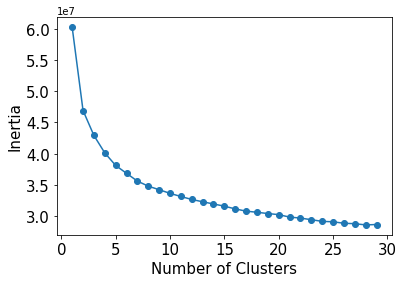

In [19]:
array=df_dv.drop(columns='Title').values
k_range=range(1,30)
inertias=[]
for k in k_range: 
    km=KMeans(n_clusters=k)
    km.fit(array)
    inertia=km.inertia_
    inertias.append(inertia)

plt.plot(k_range,inertias,marker='o')
plt.xlabel('Number of Clusters',fontsize=15)
plt.ylabel('Inertia',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

In [22]:
model=KMeans(n_clusters=6)
model.fit(array)
pred=model.predict(array)
df_pred=pd.DataFrame({'Title':df_dv_imp['Title'],'Cluster ID':pred})
df_pred.head(10)

,Title,Cluster ID
0,Accountants,3
1,Actors,2
2,Acupuncturists,1
3,Adhesive Bonding Machine Operators and Tenders,4
4,"Administrative Law Judges, Adjudicators, and H...",3
5,Administrative Services Managers,3
6,Adult Basic and Secondary Education and Litera...,3
7,Advertising Sales Agents,3
8,Advertising and Promotions Managers,3
9,Aerospace Engineering and Operations Technicians,5


In [23]:
model_p=PCA(n_components=3)
features=model_p.fit_transform(array)
df_pca=pd.DataFrame({'Title':df_dv['Title'],'Cluster_ID':df_pred['Cluster ID'],'x':features[:,0],'y':features[:,1],'z':features[:,2]})
color_dict={0:'red',1:'yellow',2:'blue',3:'green',4:'black',5:'purple'}
df_pca['Color_id']=df_pca['Cluster_ID'].map(color_dict)

In [24]:
df_pca.head()

,Title,Cluster_ID,x,y,z,Color_id
0,Accountants,3,-242.881250,-0.968701,-47.368547,green
1,Actors,2,-39.146389,-35.613643,-18.429661,blue
2,Acupuncturists,1,-144.640096,13.299568,71.430437,yellow
3,Adhesive Bonding Machine Operators and Tenders,4,129.325228,111.215557,33.131521,black
4,"Administrative Law Judges, Adjudicators, and H...",3,-200.493578,-19.815075,50.762042,green


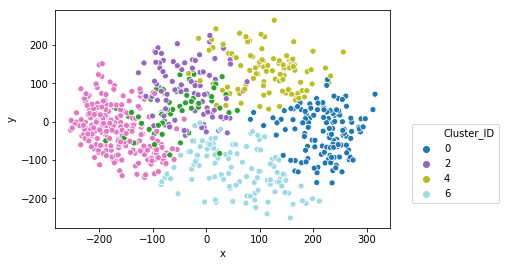

In [25]:
sns.scatterplot(x='x',y='y',hue='Cluster_ID',data=df_pca,palette='tab20')
plt.legend(bbox_to_anchor=(1.05,.5),prop={'size':10})

Text(0.5,0,'x')

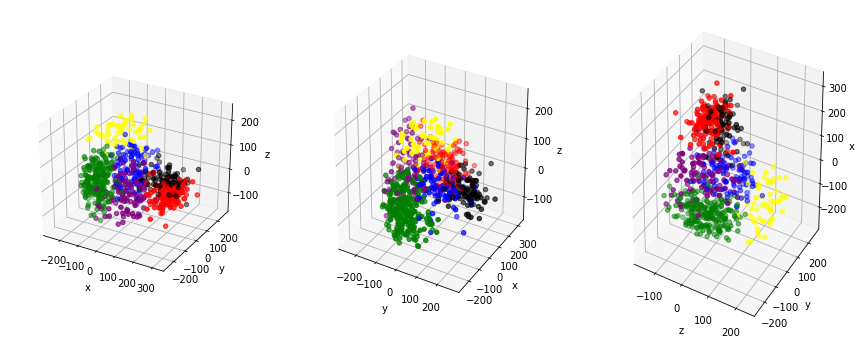

In [26]:
fig=plt.figure(figsize=(15,15))
fig.tight_layout()
ax1= fig.add_subplot(131, projection='3d',aspect='equal',adjustable='box')
ax2 = fig.add_subplot(132, projection='3d',aspect='equal',adjustable='box')
ax3 = fig.add_subplot(133, projection='3d',aspect='equal',adjustable='box')
ax1.scatter(xs=df_pca['x'],ys=df_pca['y'],zs=df_pca['z'],color=df_pca['Color_id'])
ax2.scatter(ys=df_pca['x'],xs=df_pca['y'],zs=df_pca['z'],color=df_pca['Color_id'])
ax3.scatter(zs=df_pca['x'],ys=df_pca['y'],xs=df_pca['z'],color=df_pca['Color_id'])
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('z')
ax2.set_xlabel('y')
ax2.set_ylabel('x')
ax2.set_zlabel('z')
ax3.set_xlabel('z')
ax3.set_ylabel('y')
ax3.set_zlabel('x')